**Kuramoto model - Analytical solution**

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from scipy.linalg import expm, sinm, cosm
import csv

In [2]:
N = 3 # number of oscillators

k = 1. # coupling strength
gamma = (2.*k)/np.pi # rescaling constant

# intrinsic angular frequencies
w1 = 0.
w2 = 0.
w3 = 0.
w = np.array([w1, w2, w3])*(2.0*np.pi) # vector with the intrinsic angular velocity 

A = Matrix([[0, 1, 1],
            [1, 0, 1],
            [1, 1, 0]]) # adjacency matrix

V, D = A.diagonalize()

A=np.array(A, dtype=np.complex128)
V=np.array(V, dtype=np.complex128) # base change matrix
D=np.array(D, dtype=np.complex128) # diagonal matrix

In [3]:
# solution of the equation for the variable x = exp(itheta)
def variable_x(x0, w, t, V ,D):
    x_func = np.dot(np.dot(V, expm((np.diag(1j*w) + gamma*D)*t)), np.dot(np.linalg.inv(V), x0)) 
    return x_func

In [4]:
# Synchronization order parameter 
def sync_order_parameter(N, theta): #(at a given time t)
    r_var = 0
    for i in range(len(theta)):
        for j in range(len(theta)):
        #r_var+=np.exp(1j*theta[i])
            r_var += np.cos(theta[j]-theta[i])
    r_var = (1./float(N*N))*r_var
    return r_var    

In [5]:
file = open("results_analytical.txt", "w")
writer = csv.writer(file, delimiter=' ')

# Initial conditions
t0 = 0
dt = 0.0001
steps = 100000

theta0 = np.array([1.+0j, -0.2+0j, 0.5+0j])*np.pi # t=0 (theta1, theta2, theta3)
print(theta0)
x0 = np.exp(1j* theta0) # change of variables

for n in range(steps): 
    t = t0 + n*dt # time
    x = variable_x(x0, w, t, V ,D)
    theta = (np.arctan2(np.imag(x), np.real(x))) # vector with the solution of each time iteration 
    r = np.sqrt(sync_order_parameter(N, theta)) # modulus of the sync order parameter

    
    writer.writerow(("{:.4f}".format(t), 
                         "{:.6f}".format(theta[0]), "{:.6f}".format(theta[1]), "{:.6f}".format(theta[2]),
                         "{:.6f}".format(r)))

file.close()

[ 3.14159265+0.j -0.62831853+0.j  1.57079633+0.j]


**DATA PROCESSING**

In [6]:
N = 3 # number of oscillators
steps = 100000

time = np.zeros(steps)
theta = np.zeros((steps,N))
order_p = np.zeros(steps)

lines = 0 # counter
with open("results_analytical.txt","r") as file1:
    for line in file1:
        line = line.split(' ')
        time[lines] = float(line[0])
        theta[lines]=line[1:4:]
        order_p[lines]=line[4]
        lines+=1              

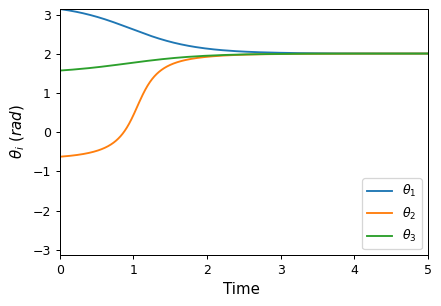

In [7]:
plt.figure(figsize=(5,3.5), dpi=90)
plt.ylabel(r'$\theta_{i} \ (rad)$', fontsize=12)
plt.xlabel('Time ', fontsize=12)
plt.plot(time,theta[:,0], label=r'$\theta_{1}$')  
plt.plot(time,theta[:,1], label=r'$\theta_{2}$') 
plt.plot(time,theta[:,2], label=r'$\theta_{3}$') 
plt.legend(loc='lower right') #bbox_to_anchor=(1, 0.5)
plt.ylim((-np.pi, np.pi))
plt.xlim((0,5))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('analytical.png')
plt.show()

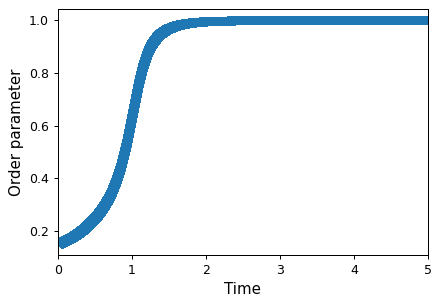

In [8]:
plt.figure(figsize=(5,3.5), dpi=90)
plt.ylabel('Order parameter', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.plot(time,order_p,'x')  
plt.xlim((0,5))

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('order_p_ana.png')
plt.show()